In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from pandas.tseries.offsets import *
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import randint
import time
import warnings

In [2]:
df = pd.read_csv('DataExtract_v4.csv') #read in CSV file provided

In [3]:
df.columns

Index(['MyDealId', 'BookingSystemName', 'Assets', 'IsPrimary',
       'OpportunityTypeValue', 'CustomerNumber', 'dealstatusvalue',
       'RegionValue', 'CountryValue', 'OwnerID',
       'TechnologySolutionOwnerBadge', 'SMEID', 'LOBNAME', 'Technologyname',
       'Fiscal Year', 'Fiscal Quarter', 'Fiscal Week', 'IntakeDate',
       'AssignedDate', 'FirstDeliverableProvidedDate', 'ContractRevenue',
       'LineItemRevenue', 'dealtechnologytags', 'Time in Job Profile'],
      dtype='object')

In [4]:
df.head()

,MyDealId,BookingSystemName,Assets,IsPrimary,OpportunityTypeValue,CustomerNumber,dealstatusvalue,RegionValue,CountryValue,OwnerID,...,Fiscal Year,Fiscal Quarter,Fiscal Week,IntakeDate,AssignedDate,FirstDeliverableProvidedDate,ContractRevenue,LineItemRevenue,dealtechnologytags,Time in Job Profile
0,443840,"DELL (DSA, Gii)",892.182861,1,Custom POS,0,Won,AMER,United States,268135.0,...,2019,2019Q01,201901,2-7-18 6:00 AM,2-7-18 6:00 AM,2-12-18 6:00 AM,1295.00,1295.00,NaN,4.95
1,443845,"DELL (DSA, Gii)",892.182861,0,Custom POS,0,Deliverable Provided,AMER,United States,268135.0,...,2019,2019Q01,201901,2-7-18 6:00 AM,2-7-18 6:00 AM,2-12-18 6:00 AM,263060.26,7964.80,NaN,4.95
2,443845,"DELL (DSA, Gii)",892.182861,1,Custom POS,0,Deliverable Provided,AMER,United States,268135.0,...,2019,2019Q01,201901,2-7-18 6:00 AM,2-7-18 6:00 AM,2-12-18 6:00 AM,263060.26,255095.46,NaN,4.95
3,443944,"DELL (DSA, Gii)",892.182861,0,Custom POS,0,Deliverable Provided,AMER,United States,268135.0,...,2019,2019Q01,201907,3-22-18 5:00 AM,3-22-18 5:00 AM,3-24-18 5:00 AM,717764.99,144000.00,NaN,4.95
4,443944,"DELL (DSA, Gii)",892.182861,1,Custom POS,0,Deliverable Provided,AMER,United States,268135.0,...,2019,2019Q01,201907,3-22-18 5:00 AM,3-22-18 5:00 AM,3-24-18 5:00 AM,717764.99,88733.33,NaN,4.95


In [5]:
len(df)

6242

In [6]:
df.columns

Index(['MyDealId', 'BookingSystemName', 'Assets', 'IsPrimary',
       'OpportunityTypeValue', 'CustomerNumber', 'dealstatusvalue',
       'RegionValue', 'CountryValue', 'OwnerID',
       'TechnologySolutionOwnerBadge', 'SMEID', 'LOBNAME', 'Technologyname',
       'Fiscal Year', 'Fiscal Quarter', 'Fiscal Week', 'IntakeDate',
       'AssignedDate', 'FirstDeliverableProvidedDate', 'ContractRevenue',
       'LineItemRevenue', 'dealtechnologytags', 'Time in Job Profile'],
      dtype='object')

In [7]:
df = df.drop_duplicates(subset=['MyDealId','BookingSystemName','Assets','IsPrimary','OpportunityTypeValue','CustomerNumber',
       'RegionValue', 'CountryValue', 'OwnerID', 'TechnologySolutionOwnerBadge', 'SMEID', 'LOBNAME', 'Technologyname', 'IntakeDate',
       'AssignedDate', 'ContractRevenue','LineItemRevenue', 'dealtechnologytags'])

In [8]:
df['Line_Counts'] = df.groupby(['MyDealId'])['LineItemRevenue'].transform('count')

In [9]:
df[['MyDealId','Line_Counts']].head()

,MyDealId,Line_Counts
0,443840,1
1,443845,2
2,443845,2
3,443944,4
4,443944,4


In [10]:
df_numeric = df[['MyDealId','Assets','IsPrimary','CustomerNumber','OwnerID',
       'TechnologySolutionOwnerBadge', 'SMEID', 'IntakeDate', 'Fiscal Week',
       'AssignedDate', 'FirstDeliverableProvidedDate',
       'ContractRevenue','LineItemRevenue','Line_Counts']]
corr = df_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')
#corr.to_csv('result1.csv')

,MyDealId,Assets,IsPrimary,OwnerID,TechnologySolutionOwnerBadge,SMEID,Fiscal Week,ContractRevenue,LineItemRevenue,Line_Counts
MyDealId,1,0.0416092,0.167669,0.35142,0.348844,-0.252251,0.949909,-0.00659162,0.0035685,-0.151749
Assets,0.0416092,1,0.0119238,-0.0372847,-0.0365429,0.0248833,0.048277,0.0152461,0.0325092,-0.0106446
IsPrimary,0.167669,0.0119238,1,0.103964,0.110115,-0.343158,0.202479,-0.162822,-0.0165086,-0.685733
OwnerID,0.35142,-0.0372847,0.103964,1,0.986269,-0.166084,0.341488,0.0351223,0.0244835,-0.0671808
TechnologySolutionOwnerBadge,0.348844,-0.0365429,0.110115,0.986269,1,-0.164558,0.340601,0.0341157,0.02385,-0.07152
SMEID,-0.252251,0.0248833,-0.343158,-0.166084,-0.164558,1,-0.264355,0.0965355,0.0619204,0.35766
Fiscal Week,0.949909,0.048277,0.202479,0.341488,0.340601,-0.264355,1,-0.0366058,-0.0166902,-0.184112
ContractRevenue,-0.00659162,0.0152461,-0.162822,0.0351223,0.0341157,0.0965355,-0.0366058,1,0.662297,0.202782
LineItemRevenue,0.0035685,0.0325092,-0.0165086,0.0244835,0.02385,0.0619204,-0.0166902,0.662297,1,0.101105
Line_Counts,-0.151749,-0.0106446,-0.685733,-0.0671808,-0.07152,0.35766,-0.184112,0.202782,0.101105,1


In [11]:
df['AssignedDate'] = pd.to_datetime(df['AssignedDate'])

In [12]:
df['IntakeDate'] = pd.to_datetime(df['IntakeDate'])
df['FirstDeliverableProvidedDate'] = pd.to_datetime(df['FirstDeliverableProvidedDate'])


In [13]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [14]:
missing_values_table(df)

Your selected dataframe has 25 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
dealtechnologytags,3216,51.5


In [15]:
# df.drop(columns=['Fiscal Year','Fiscal Week','Fiscal Quarter'],inplace=True)

In [16]:
# Previous way to calculate time between Assigned and Deliverable Provided
# No longer being used because Numpy count reliably makes more sense for our application 

#df['y'] = df.apply(lambda x: len(pd.bdate_range(x['AssignedDate'], x['FirstDeliverableProvidedDate'])), axis=1)

In [17]:
A = [d.date() for d in df['AssignedDate']]
B = [d.date() for d in df['FirstDeliverableProvidedDate']]

df['y'] = np.busday_count(A,B)

In [55]:
for i in range(len(df['y'])):
    df['y'][i] = max(df['y'][i],0)

In [56]:
df['y'].value_counts()

1      1325
0       944
2       739
3       509
4       401
5       378
6       273
7       214
8       182
9       138
10      105
11      103
12       83
14       66
15       59
16       58
13       55
20       45
19       43
17       41
18       38
23       31
22       29
26       25
21       24
25       21
30       19
60       18
27       17
32       16
       ... 
52        2
124       2
104       2
93        2
69        2
71        2
70        2
49        2
63        2
64        2
68        2
51        1
120       1
61        1
197       1
186       1
184       1
149       1
66        1
115       1
117       1
74        1
111       1
105       1
102       1
91        1
57        1
84        1
80        1
89        1
Name: y, Length: 96, dtype: int64

In [18]:
# df['year'] = df['AssignedDate'].dt.year
# df['month'] = df['AssignedDate'].dt.month
df['day'] = df['AssignedDate'].dt.day

In [19]:
unique_ids = df['OwnerID'].unique()

new_df = pd.DataFrame(columns= df.columns)

for num in unique_ids:
    temp = df[df['OwnerID']== num]
    temp = temp.sort_values(by=['AssignedDate'], ascending=False)
    for i in range(len(temp)):
        temp['Time in Job Profile'].iloc[i] = max(0,temp['Time in Job Profile'].iloc[0] - ((temp['AssignedDate'].iloc[0] - temp['AssignedDate'].iloc[i]).days/30/12))
    new_df = new_df.append(temp, ignore_index=True)


C:\Users\rmead\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\rmead\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\rmead\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\User

C:\Users\rmead\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\rmead\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\rmead\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\User

C:\Users\rmead\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\rmead\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\rmead\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\User

C:\Users\rmead\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\rmead\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\rmead\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\User

C:\Users\rmead\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
len(new_df)

6242

In [21]:
new_df[new_df['Time in Job Profile'] < 0]

,MyDealId,BookingSystemName,Assets,IsPrimary,OpportunityTypeValue,CustomerNumber,dealstatusvalue,RegionValue,CountryValue,OwnerID,...,IntakeDate,AssignedDate,FirstDeliverableProvidedDate,ContractRevenue,LineItemRevenue,dealtechnologytags,Time in Job Profile,Line_Counts,y,day


In [22]:
df = new_df.copy(deep=True)

In [23]:
df.drop(columns=['dealtechnologytags'], inplace=True)

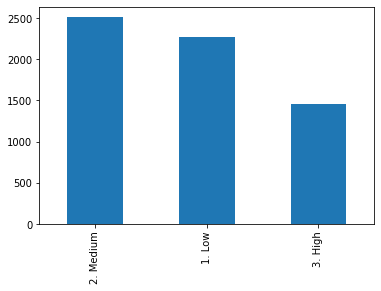

In [24]:
df['deal_complexity'] = np.where(df['y'] <= 1, '1. Low',
                                 np.where(df['y'] <= 7, '2. Medium', '3. High'
                                        ))
df['deal_complexity'].value_counts().plot(kind='bar')

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score

In [26]:
y=df['deal_complexity']
X = df.copy(deep=True)
X.drop(columns = ['MyDealId','FirstDeliverableProvidedDate','AssignedDate'], inplace=True)
X.drop(columns=['y','deal_complexity'],inplace=True)

In [27]:
X.columns

Index(['BookingSystemName', 'Assets', 'IsPrimary', 'OpportunityTypeValue',
       'CustomerNumber', 'dealstatusvalue', 'RegionValue', 'CountryValue',
       'OwnerID', 'TechnologySolutionOwnerBadge', 'SMEID', 'LOBNAME',
       'Technologyname', 'Fiscal Year', 'Fiscal Quarter', 'Fiscal Week',
       'IntakeDate', 'ContractRevenue', 'LineItemRevenue',
       'Time in Job Profile', 'Line_Counts', 'day'],
      dtype='object')

In [28]:
X['Fiscal Quarter'] = df['Fiscal Quarter'].str.strip().str[-2:]

In [29]:
X['Fiscal Quarter'] = X['Fiscal Quarter'].astype(int)

In [30]:
X['Fiscal Week'] = df['Fiscal Week'].astype(str).str.strip().str[-2:]
X['Fiscal Week'] = X['Fiscal Week'].astype(int)

In [31]:
X.drop(columns=['RegionValue'], inplace=True)

In [32]:
X.drop(columns=['IntakeDate'], inplace=True)

In [33]:
numeric_features = ['Assets', 'IsPrimary',
       'ContractRevenue', 'LineItemRevenue','Fiscal Year','Fiscal Quarter','Fiscal Week','day','Time in Job Profile']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['BookingSystemName', 'OpportunityTypeValue', 'CustomerNumber', 'dealstatusvalue', 'CountryValue', 'OwnerID',
       'TechnologySolutionOwnerBadge', 'SMEID', 'LOBNAME', 'Technologyname',]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

C:\Users\rmead\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


model score: 0.588


In [34]:
predictions = clf.predict(X_test)

In [35]:
confusion_matrix(y_test, predictions)

array([[326, 104,  39],
       [ 99, 319,  64],
       [ 51, 158,  89]], dtype=int64)

In [36]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',RandomForestClassifier())])

best_model = []

# function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        #rank_test_score is in cv_results_ dict (attribute of GridSearchCV)
        #return non-zero indicies in flattened version
        candidates = np.flatnonzero(results['rank_test_score'] == i) 
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f})".format(results['mean_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            best_model.append(results['params'][candidate])

# specify parameters and distributions to sample from
param_dist = {"classifier__n_estimators": [10,20,30,40,50],
              "classifier__max_depth": [3,5,7,10,20,25],
              "classifier__max_features": randint(20, 50),
              "classifier__min_samples_split": randint(5, 20), 
              "classifier__bootstrap": [True, False],
              "classifier__criterion": ["gini", "entropy"]}

n_iter_search = 50
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)


print("Performing random search...")
print("pipeline:", [name for name, _ in clf.steps])

random_search.fit(X_train, y_train)
print()

#call function defined above
report(random_search.cv_results_)

# BELOW DOESN'T RUN, BUT IS WHAT I'D PREFER / LONG WAY FOLLOWS
# clf.fit(X_train,y_train,**best_model[0])
# ### OR ###
# model_best = Pipeline(steps=[('preprocessor', preprocessor),
#                              ('clf', RandomForestClassifier())],**best_model[0])

model_best = Pipeline(steps=[('preprocessor', preprocessor),
                             ('clf', RandomForestClassifier(
                                     n_estimators=best_model[0]['classifier__n_estimators'],
                                     criterion=best_model[0]['classifier__criterion'],
                                     max_depth=best_model[0]['classifier__max_depth'],
                                     max_features=best_model[0]['classifier__max_features'],
                                     min_samples_split=best_model[0]['classifier__min_samples_split']))])


model_best.fit(X_train,y_train)
y_pred = model_best.predict(X_test)

# Display confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print('Confusion Matrix for Best Model')
print(conf_matrix)



Performing random search...
pipeline: ['preprocessor', 'classifier']

Model with rank: 1
Mean validation score: 0.621)
Parameters: {'classifier__bootstrap': False, 'classifier__criterion': 'entropy', 'classifier__max_depth': 20, 'classifier__max_features': 40, 'classifier__min_samples_split': 12, 'classifier__n_estimators': 40}

Model with rank: 2
Mean validation score: 0.619)
Parameters: {'classifier__bootstrap': False, 'classifier__criterion': 'entropy', 'classifier__max_depth': 20, 'classifier__max_features': 46, 'classifier__min_samples_split': 14, 'classifier__n_estimators': 30}

Model with rank: 3
Mean validation score: 0.619)
Parameters: {'classifier__bootstrap': True, 'classifier__criterion': 'gini', 'classifier__max_depth': 25, 'classifier__max_features': 43, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 30}

Confusion Matrix for Best Model
[[278 169  22]
 [ 47 405  30]
 [ 22 188  88]]


In [37]:
#Try a couple of MLPs

warnings.simplefilter('ignore')

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',MLPClassifier(max_iter=500, momentum=0.95))])


# specify parameters and distributions to sample from
param_dist = {"classifier__hidden_layer_sizes": [(100),(256)],
              "classifier__solver": ['sgd','adam'],
              "classifier__activation": ['logistic','tanh','relu']}

n_iter_search = 5
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3, iid=False)


print("Performing random search...")
print("pipeline:", [name for name, _ in clf.steps])

random_search.fit(X_train, y_train)
print()

#call function defined above
report(random_search.cv_results_)

# BELOW DOESN'T RUN, BUT IS WHAT I'D PREFER / LONG WAY FOLLOWS
# clf.fit(X_train,y_train,**best_model[0])
# ### OR ###
# model_best = Pipeline(steps=[('preprocessor', preprocessor),
#                              ('clf', RandomForestClassifier())],**best_model[0])

model_best = Pipeline(steps=[('preprocessor', preprocessor),
                             ('clf', MLPClassifier(
                                     max_iter = 500,
                                     momentum=0.95,
                                     hidden_layer_sizes=best_model[3]['classifier__hidden_layer_sizes'],
                                     solver=best_model[3]['classifier__solver'],
                                     activation=best_model[3]['classifier__activation']))])


model_best.fit(X_train,y_train)
y_pred = model_best.predict(X_test)

# Display confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print('Confusion Matrix for Best Model')
print(conf_matrix)


Performing random search...
pipeline: ['preprocessor', 'classifier']

Model with rank: 1
Mean validation score: 0.580)
Parameters: {'classifier__solver': 'sgd', 'classifier__hidden_layer_sizes': 100, 'classifier__activation': 'tanh'}

Model with rank: 2
Mean validation score: 0.580)
Parameters: {'classifier__solver': 'sgd', 'classifier__hidden_layer_sizes': 256, 'classifier__activation': 'relu'}

Model with rank: 3
Mean validation score: 0.553)
Parameters: {'classifier__solver': 'adam', 'classifier__hidden_layer_sizes': 256, 'classifier__activation': 'tanh'}

Confusion Matrix for Best Model
[[287 145  37]
 [ 83 340  59]
 [ 36 156 106]]


In [38]:
models_list = [RandomForestClassifier(
                                     n_estimators=best_model[0]['classifier__n_estimators'],
                                     criterion=best_model[0]['classifier__criterion'],
                                     max_depth=best_model[0]['classifier__max_depth'],
                                     max_features=best_model[0]['classifier__max_features'],
                                     min_samples_split=best_model[0]['classifier__min_samples_split']),
               DecisionTreeClassifier(splitter='best'), 
               LogisticRegression(),
               MLPClassifier(
                                     max_iter = 500,
                                     momentum=0.95,
                                     hidden_layer_sizes=best_model[3]['classifier__hidden_layer_sizes'],
                                     solver=best_model[3]['classifier__solver'],
                                     activation=best_model[3]['classifier__activation'])]

names = ['RandomForest','Decision Tree','Logistic','MLP']


for classifier in models_list:
            model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', classifier)])
            model.fit(X_train,y_train)
            y_pred = model.predict(X_test)
           
            
            conf_matrix = confusion_matrix(y_test, y_pred)
            print(names[models_list.index(classifier)])
            print('Confusion Matrix:')
            print(conf_matrix)
            print('Score:')
            print(round(model.score(X_test, y_test),4))
            print()


RandomForest
Confusion Matrix:
[[274 169  26]
 [ 47 395  40]
 [ 19 185  94]]
Score:
0.6109

Decision Tree
Confusion Matrix:
[[300 110  59]
 [107 278  97]
 [ 63 120 115]]
Score:
0.5548

Logistic
Confusion Matrix:
[[285 148  36]
 [116 310  56]
 [ 39 160  99]]
Score:
0.5556

MLP
Confusion Matrix:
[[288 140  41]
 [ 80 351  51]
 [ 43 152 103]]
Score:
0.5941



In [39]:
X_dummies = pd.get_dummies(X[categorical_features])
X_tr2, X_ts2, y_train2, y_test2 = train_test_split(X_dummies, y, test_size=0.2)

In [40]:
X_dummies.dtypes

X_dummies.drop(columns=['OwnerID'], inplace=True)

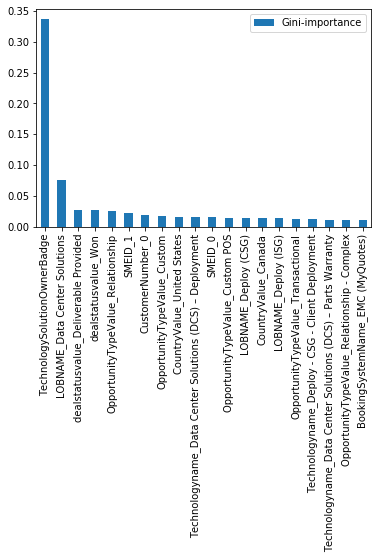

In [41]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_dummies,y)

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_dummies.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances[importances.values > 0]
importances.sort_values(by='Gini-importance',ascending=False)[:20].plot(kind='bar')

In [42]:
clf = DecisionTreeClassifier(min_samples_leaf=50, max_depth=5)
clf.fit(X_tr2,y_train2)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
clf.score(X_ts2, y_test2)

0.5316253002401922

In [44]:
# with open("sa_tree_viz3.dot", 'w') as f:
#     f = export_graphviz(clf, out_file=f)

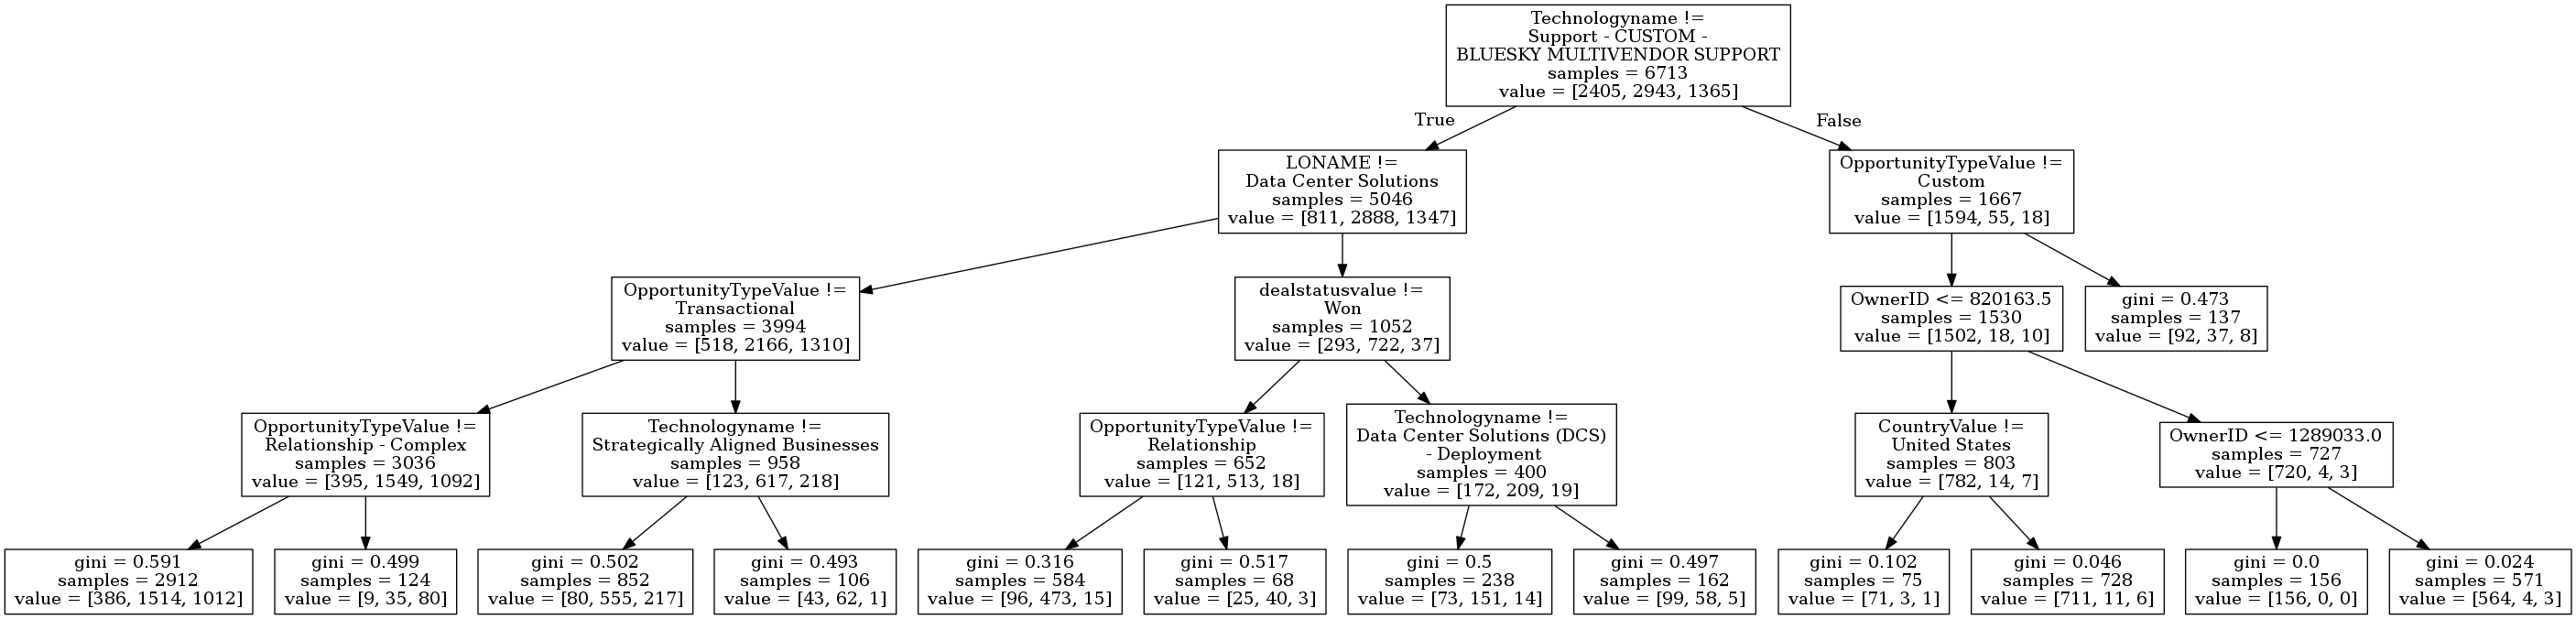

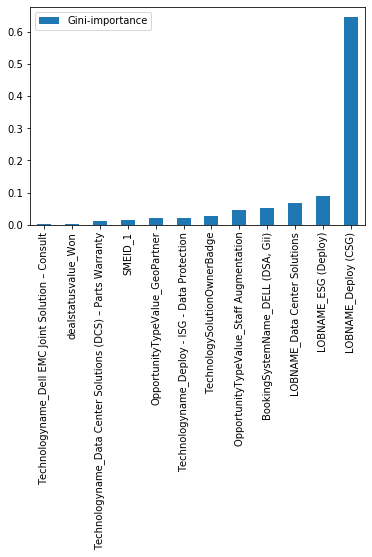

In [45]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_dummies.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances[importances.values > 0]
importances.sort_values(by='Gini-importance').plot(kind='bar')



In [46]:
clf = DecisionTreeClassifier(min_samples_leaf=70, max_depth=7, max_features=12)
clf.fit(X_tr2,y_train2)
clf.score(X_ts2, y_test2)

0.45716573258606885

In [47]:
# with open("tree_viz2.dot", 'w') as f:
#     f = export_graphviz(clf, out_file=f)

In [48]:
to_filter = data[data['Technologyname'] != 'Support - CUSTOM - BLUESKY MULTIVENDOR SUPPORT']
to_filter = to_filter[to_filter['LOBNAME'] != 'Data Center Solutions']
to_filter = to_filter[to_filter['OpportunityTypeValue'] != 'Transactional']
to_filter = to_filter[to_filter['OpportunityTypeValue'] != 'Relationship - Complex']


NameError: name 'data' is not defined

In [ ]:
y2 = to_filter['deal_complexity']
X2 = to_filter
X2.drop(columns=['y','deal_complexity'],inplace=True)

X2_dummies = pd.get_dummies(X2[categorical_features])
X_tr3, X_ts3, y_train3, y_test3 = train_test_split(X2_dummies, y2, test_size=0.2)

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=70, max_depth=3, max_features=6)
clf.fit(X_tr2,y_train2)
clf.score(X_ts2, y_test2)

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=70, max_depth=3, max_features=6)
clf.fit(X_tr2,y_train2)
clf.score(X_ts2, y_test2)

In [ ]:
# with open("tree_viz_mini.dot", 'w') as f:
#     f = export_graphviz(clf, out_file=f)

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=70, max_depth=3, max_features=6)
clf.fit(X_tr2,y_train2)
clf.score(X_ts2, y_test2)


In [ ]:
# with open("tree_viz_mini6.dot", 'w') as f:
#     f = export_graphviz(clf, out_file=f)

In [49]:
df.columns

Index(['MyDealId', 'BookingSystemName', 'Assets', 'IsPrimary',
       'OpportunityTypeValue', 'CustomerNumber', 'dealstatusvalue',
       'RegionValue', 'CountryValue', 'OwnerID',
       'TechnologySolutionOwnerBadge', 'SMEID', 'LOBNAME', 'Technologyname',
       'Fiscal Year', 'Fiscal Quarter', 'Fiscal Week', 'IntakeDate',
       'AssignedDate', 'FirstDeliverableProvidedDate', 'ContractRevenue',
       'LineItemRevenue', 'Time in Job Profile', 'Line_Counts', 'y', 'day',
       'deal_complexity'],
      dtype='object')

In [73]:
df['y'] = df['y'].astype(float)
df[['LOBNAME','y']].groupby('LOBNAME').mean()

,y
LOBNAME,
ARR,37.000000
CI-HCI,8.932624
Configuration Services,1.000000
Consult,8.204054
Data Center Solutions,4.578210
Deploy (CSG),8.202970
Deploy (ISG),7.254860
EMC,1.299213
ESG (Deploy),7.108696


In [75]:
df[['LOBNAME','y']].groupby('LOBNAME').agg('count')

,y
LOBNAME,
ARR,2
CI-HCI,282
Configuration Services,1
Consult,740
Data Center Solutions,1285
Deploy (CSG),1010
Deploy (ISG),1389
EMC,127
ESG (Deploy),368


In [81]:
df_out = df[['LOBNAME','Technologyname','y']].groupby(['LOBNAME','Technologyname']).agg('count')

In [82]:
df_out.to_csv('LOBTechnologynameMap.csv')

In [83]:
df['LOBNAME'].value_counts()

Deploy (ISG)              1389
Data Center Solutions     1285
Deploy (CSG)              1010
Consult                    740
EUC (Deploy)               676
ESG (Deploy)               368
Support                    362
CI-HCI                     282
EMC                        127
ARR                          2
Configuration Services       1
Name: LOBNAME, dtype: int64

In [85]:
df[['Technologyname','y']].groupby('Technologyname').mean()